# Importando bibliotecas necessárias

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# conexão e obtenção de dados da tabela mysql

In [102]:
# Configuração da conexão
conexao = create_engine('mysql+mysqlconnector://root:@localhost/dados_circo')

# Consulta SQL
query = "SELECT * FROM dados_circo"

# Lendo dados com pandas
df = pd.read_sql(query, conexao)


# Exibir o DataFrame
print(df)

# Fechar a conexão
conexao.dispose()

# melhorar a visualização dos dados, o valor do PIB foi retirado alguns zeros, de modo que 1000 é equivalente a 1 bilhão


   CIDADE  HABITANTES   PIB  PIB_PER_CAPITA  SALARIO_MEDIO  DIAS_DE_EVENTO  \
0       1       64400  2500             492           3000              30   
1       2        5100  1554             291           1900              12   
2       3       85100  2500             291           2400              29   
3       4       52400  1500             280           2100              22   
4       5       15300  1000             764           2800              14   
5       6       18900   446             243           2200              22   
6       7        8100   274             325           2200               7   
7       8       44300  1000             223           2000              13   
8       9       12500   302             237           2100               7   
9      10       42500  1100             261           2200              30   
10     11       73700  1600             224           2300               9   
11     12       26700   547             218           2000      

# Definição da função que Cria uma correlação de dados da tabela

          LUCRO       PIB
LUCRO  1.000000  0.665988
PIB    0.665988  1.000000


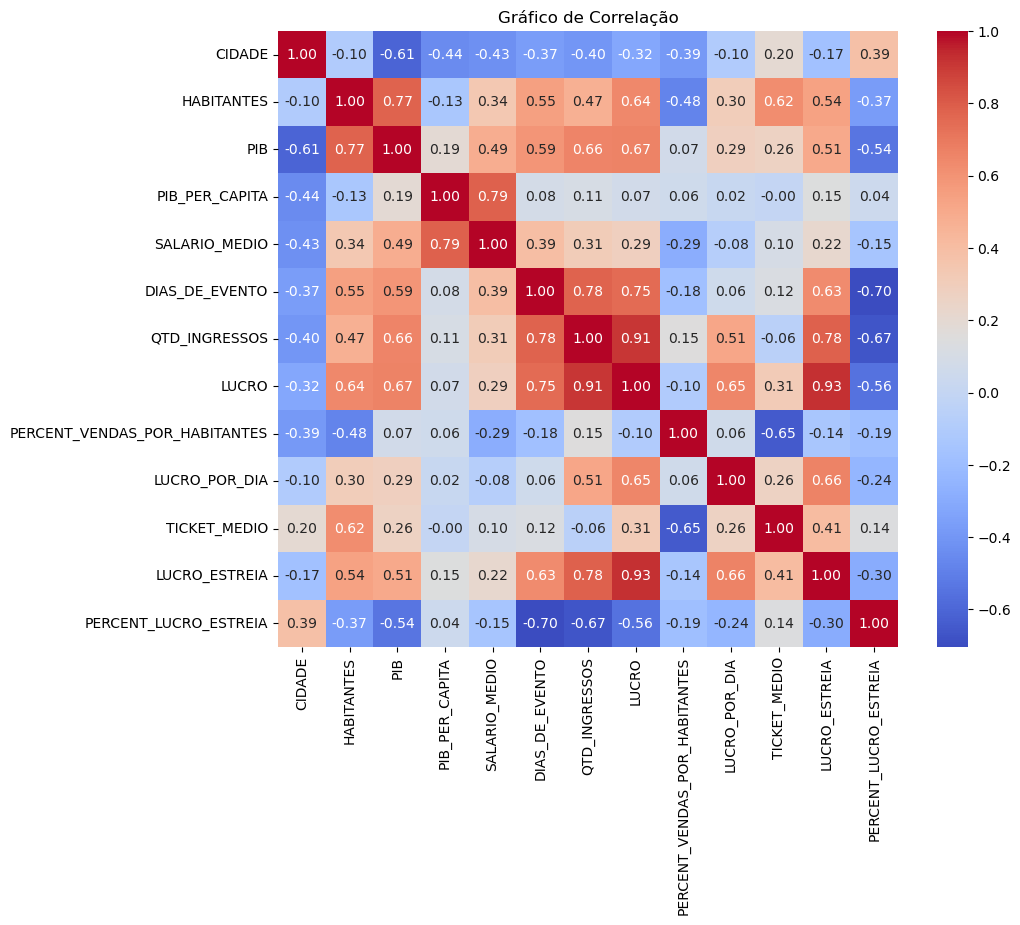

In [91]:
correlacao = df[['LUCRO', 'PIB']].corr()
print(correlacao)

# Criar e Exibir o mapa de calor
correlacao_total = df.corr()


plt.figure(figsize=(10,8))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de Correlação')
plt.show()

# Definição da função que Cria uma análise de regressão dos dados da tabela

In [104]:
# Variáveis independentes (X)
X = df[['HABITANTES', 'PIB', 'DIAS_DE_EVENTO','PIB_PER_CAPITA', 'SALARIO_MEDIO']]

# Adiciona constante para o termo independente na regressão
X = sm.add_constant(X)

# Variável dependente (y)
y = df['LUCRO']

# Cria e ajusta o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Exibe os resultados da regressão
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  LUCRO   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     2.963
Date:                Mon, 27 Nov 2023   Prob (F-statistic):              0.109
Time:                        01:20:30   Log-Likelihood:                -136.18
No. Observations:                  12   AIC:                             284.4
Df Residuals:                       6   BIC:                             287.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.273e+04   9.69e+04      0.

C:\Users\praga\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Definição da função que cria outras análises dos dados da tabela

C:\Users\praga\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\praga\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

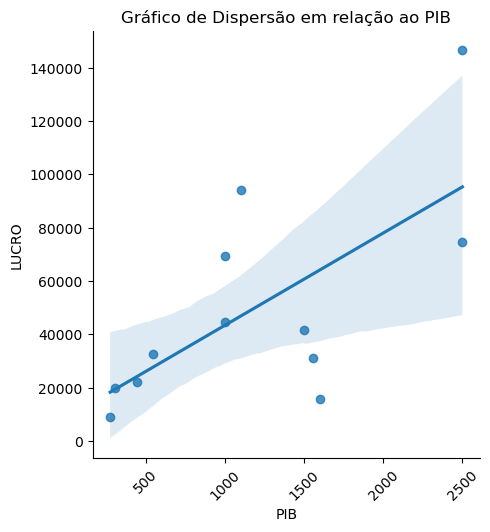

<Figure size 1000x800 with 0 Axes>

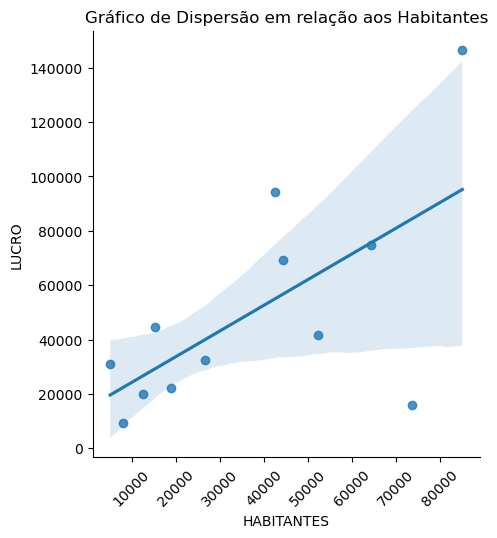

In [79]:

# Gráfico de dispersão com linha de regressão em relação do PIB com o Lucro
plt.figure(figsize=(10, 8))
sns.lmplot(x='PIB', y='LUCRO', data=df)
plt.xlabel('PIB')
plt.ylabel('LUCRO')
plt.title('Gráfico de Dispersão em relação ao PIB')
plt.xticks(rotation=45)

# Gráfico de dispersão com linha de regressão em relação do numero de Habitantes com o Lucro
plt.figure(figsize=(10, 8))
sns.lmplot(x='HABITANTES', y='LUCRO', data=df)
plt.xlabel('HABITANTES')
plt.ylabel('LUCRO')
plt.title('Gráfico de Dispersão em relação aos Habitantes')
plt.xticks(rotation=45)

plt.show()

#  Exibe Gráfico de análise de Histograma do lucro

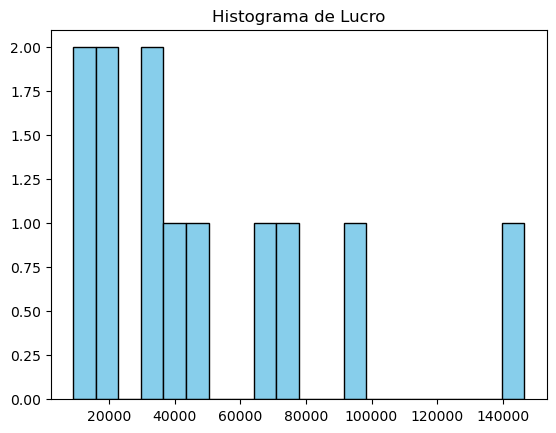

In [80]:
 # Histograma de lucro
plt.hist(df['LUCRO'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Lucro')
plt.show()

#  Exibe Gráfico de Barras para análise comparativa das cidades

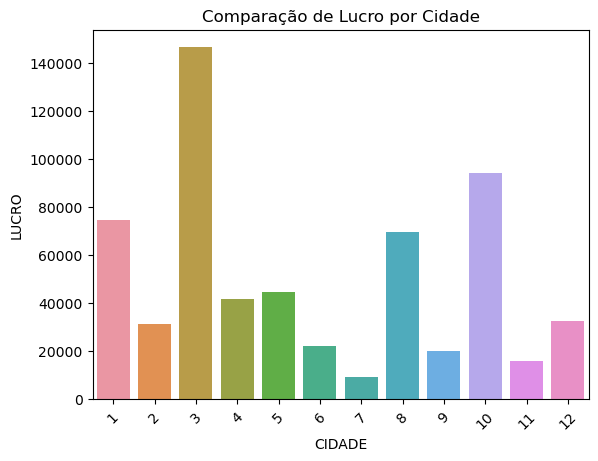

In [50]:
 # Gráfico de barras comparativo por cidade
sns.barplot(x='CIDADE', y='LUCRO', data=df, errorbar=None)
plt.title('Comparação de Lucro por Cidade')
plt.xticks(rotation=45)
plt.show()

#  Exibe Gráfico de análise de Histograma do Habitantes

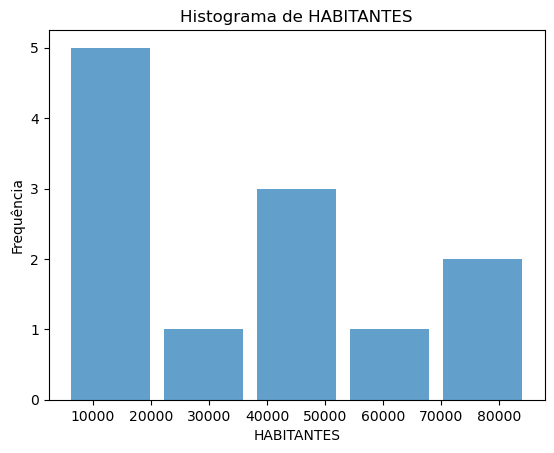

In [44]:
# Visualização 3: Histograma
plt.hist(df['HABITANTES'], bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('HABITANTES')
plt.ylabel('Frequência')
plt.title('Histograma de HABITANTES')
plt.show()

#  Exibe Gráfico de análise de Histograma do lucro

In [85]:
# filtrando as colunas para melhor visualização
df2 = df[['CIDADE','HABITANTES','PIB','DIAS_DE_EVENTO','LUCRO']]

# Identificar cidades com lucro acima de 75% do IQR
limite_superior = df2['LUCRO'].quantile(0.75) + 1.5 * (df2['LUCRO'].quantile(0.75) - df2['LUCRO'].quantile(0.25))
outliers = df2[df['LUCRO'] > limite_superior]
print('Cidades com lucro considerado outlier:\n')
print(outliers)

Cidades com lucro considerado outlier:

  CIDADE  HABITANTES   PIB  DIAS_DE_EVENTO   LUCRO
2      3       85100  2500              29  146482


# Estatísticas descritivas


In [87]:
desc_estatisticas = df.describe()
print(desc_estatisticas)

         HABITANTES          PIB  PIB_PER_CAPITA  SALARIO_MEDIO  \
count     12.000000    12.000000       12.000000      12.000000   
mean   37416.666667  1193.583333      320.750000    2266.666667   
std    27115.136106   768.920549      158.213966     328.449064   
min     5100.000000   274.000000      218.000000    1900.000000   
25%    14600.000000   521.750000      233.750000    2075.000000   
50%    34600.000000  1050.000000      270.500000    2200.000000   
75%    55400.000000  1565.500000      299.500000    2325.000000   
max    85100.000000  2500.000000      764.000000    3000.000000   

       DIAS_DE_EVENTO  QTD_INGRESSOS          LUCRO  \
count       12.000000      12.000000      12.000000   
mean        17.666667    2103.250000   50151.833333   
std          8.742096    1412.921546   39911.012563   
min          7.000000     348.000000    9169.000000   
25%         11.250000    1215.000000   21501.750000   
50%         15.500000    1515.500000   37147.000000   
75%        

# Conclusão do Projeto:

O projeto analisou dados relacionados a eventos de circo em diferentes cidades, buscando entender a influência de variáveis como o número de habitantes, PIB, dias de evento, PIB per capita e salário médio no lucro obtido. A seguir, apresento as principais conclusões:

### 1. Análise Descritiva:

1. LUCRO: O lucro médio observado é de 50.151,83, mostrando uma variabilidade considerável entre as cidades.
    
2. HABITANTES: A média de habitantes nas regiões analisadas é de 37.416,67, sem uma relação estatisticamente significativa com o lucro.
    
3. PIB: O PIB médio é de 1.193,58, sugerindo uma possível relação positiva com o lucro, mas sem significância estatística.
    
4. DIAS_DE_EVENTO: A média de dias de evento é 17,67, mostrando uma possível influência positiva no lucro, mas sem significância estatística.
    
5. PIB_PER_CAPITA: O valor médio do PIB per capita é de 320,75, sem significância estatística na relação com o lucro.
    
6. SALARIO_MEDIO: A média salarial é -68,65, indicando uma possível influência negativa no lucro, mas sem significância estatística.

### 2. Regressão Linear Múltipla:

1. R-squared: O modelo explica 71,2% da variabilidade no lucro, indicando um ajuste global razoável.

2. Adj. R-squared: O ajuste para a complexidade do modelo é 47,1%, mostrando uma relação moderada entre as variáveis independentes e o lucro.

3. F-statistic (Valor-p): O teste global de significância sugere que o modelo como um todo pode não ser estatisticamente significativo a um nível convencional de significância (0,109).

### 3. Coeficientes:

1. HABITANTES e PIB: Apesar de positivos, não são estatisticamente significativos.

2. DIAS_DE_EVENTO: Embora positivo, não é estatisticamente significativo a um nível de 0,05 (0,080).

3. PIB_PER_CAPITA: Não é estatisticamente significativo.

4. SALARIO_MEDIO: Indica uma possível influência negativa no lucro, mas não é estatisticamente significativo.

### 4. Multicolinearidade:

A multicolinearidade pode estar presente, sugerida pelo alto valor da Cond. No. Recomenda-se uma análise mais aprofundada.

### 5. Visualizações Gráficas:

1. Gráficos de dispersão e histogramas oferecem insights visuais sobre as relações entre variáveis.
2. Identificação de uma cidade considerada outlier em termos de lucro (Cidade 3).

### 6. Proximo passo:

Visto que a quantidade de dados está afetando a qualidade da análise e impossibilitando de uma abordagem mais profunda, o próximo passo seria adptar o processo de coleta de dados para que eu possa aumentar o grau de confiança e aprimorar a análise.

### 6. Conclusões Gerais:

Em resumo, embora o modelo de regressão linear múltipla tenha explicado uma parte significativa da variabilidade no lucro, a falta de significância estatística em algumas variáveis sugere a necessidade de uma abordagem mais aprofundada.